In [ ]:
!pip install rasterio



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 44.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import shapely
import geopandas as gpd
import glob
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

import zipfile
import rasterio
from rasterio.plot import show

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Datos temperatura exploracion

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Proyecto integrador eq 29/data/islasCalor/centigrados-20240919T003308Z-002.zip", 'r')
zip_ref.extractall("/tmp/centigrados_2")
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Proyecto integrador eq 29/data/islasCalor/centigrados-20240919T003308Z-001.zip", 'r')
zip_ref.extractall("/tmp/centigrados_1")
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Proyecto integrador eq 29/data/islasCalor/rural-20240919T003320Z-002.zip", 'r')
zip_ref.extractall("/tmp/rural_2")
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Proyecto integrador eq 29/data/islasCalor/rural-20240919T003320Z-001.zip", 'r')
zip_ref.extractall("/tmp/rural_1")
zip_ref.close()

In [ ]:
/tmp

drive/  sample_data/


In [ ]:
# cantidad de ciudades donde se tienen datos
lista=glob.glob("/tmp/rural_1/rural/*")+glob.glob("/tmp/rural_2/rural/*")


for x in lista:
  print(x)

print(len(lista))

/tmp/rural_1/rural/ht_island_rural_Tuxtla Gutiérrez.tif
/tmp/rural_1/rural/ht_island_rural_Coatzacoalcos.tif
/tmp/rural_1/rural/ht_island_rural_Mazatlán.tif
/tmp/rural_1/rural/ht_island_rural_Acapulco.tif
/tmp/rural_1/rural/ht_island_rural_Ocotlán.tif
/tmp/rural_1/rural/ht_island_rural_Irapuato.tif
/tmp/rural_1/rural/ht_island_rural_Querétaro.tif
/tmp/rural_1/rural/ht_island_rural_Lázaro Cárdenas.tif
/tmp/rural_1/rural/ht_island_rural_Durango.tif
/tmp/rural_1/rural/ht_island_rural_Huauchinango.tif
/tmp/rural_1/rural/ht_island_rural_Xalapa.tif
/tmp/rural_1/rural/ht_island_rural_Tlaxcala-Apizaco.tif
/tmp/rural_1/rural/ht_island_rural_Guaymas.tif
/tmp/rural_1/rural/ht_island_rural_Minatitlán.tif
/tmp/rural_1/rural/ht_island_rural_Córdoba.tif
/tmp/rural_1/rural/ht_island_rural_Oaxaca.tif
/tmp/rural_1/rural/ht_island_rural_Cuernavaca.tif
/tmp/rural_1/rural/ht_island_rural_Cuautla.tif
/tmp/rural_1/rural/ht_island_rural_Orizaba.tif
/tmp/rural_1/rural/ht_island_rural_Puerto Vallarta.tif
/tmp/r

# cent df

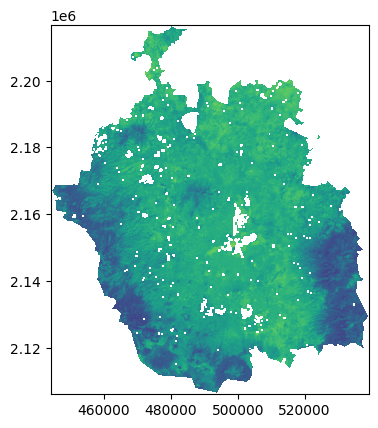

<Axes: >

In [ ]:
fp = r'/tmp/centigrados_1/centigrados/ht_island_cent_Ciudad de México.tif'
img1 = rasterio.open(fp)
show(img1)

In [ ]:
img1.shape

(3686, 3172)

In [ ]:
img1.read()

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

In [ ]:
imarray1 = np.array(img1.read())
print(imarray1[~np.isnan(imarray1)])

[28.50219122 27.98766528 28.61742732 ... 17.62480866 17.84697996
 17.67390386]


In [ ]:
img1.transform

Affine(30.0, 0.0, 444000.0,
       0.0, -30.0, 2216730.0)

In [ ]:
img1.bounds


BoundingBox(left=444000.0, bottom=2106150.0, right=539160.0, top=2216730.0)

In [ ]:
zz = img1.read(1)
x = np.linspace(img1.bounds.left, img1.bounds.right, img1.shape[1])
y = np.linspace(img1.bounds.bottom, img1.bounds.top, img1.shape[0])
xx, yy = np.meshgrid(x, y)
df_cent_cdm = pd.DataFrame({
    'x': xx.flatten(),
    'y': yy.flatten(),
    'centi': zz.flatten(),
})
df_cent_cdm.head(1)

,x,y,centi
0,444000.0,2106150.0,NaN


In [ ]:
df_cent_cdm.loc[~(df_cent_cdm.centi.isna())]

,x,y,centi
4366,479831.296121,2.106180e+06,28.502191
4367,479861.305582,2.106180e+06,27.987665
7537,479801.286660,2.106210e+06,28.617427
7538,479831.296121,2.106210e+06,28.346915
7539,479861.305582,2.106210e+06,27.787597
...,...,...,...
11687302,493635.648061,2.216700e+06,16.684232
11687303,493665.657521,2.216700e+06,17.188545
11687304,493695.666982,2.216700e+06,17.624809
11687305,493725.676443,2.216700e+06,17.846980


In [ ]:
df_cent_cdm.describe()

,x,y,centi
count,1.169199e+07,1.169199e+07,6.713808e+06
mean,4.915800e+05,2.161440e+06,2.983544e+01
std,2.747899e+04,3.193036e+04,6.274791e+00
min,4.440000e+05,2.106150e+06,2.977557e+00
25%,4.677900e+05,2.133787e+06,2.672714e+01
50%,4.915800e+05,2.161440e+06,3.199733e+01
75%,5.153700e+05,2.189093e+06,3.415400e+01
max,5.391600e+05,2.216730e+06,5.240616e+01


#rural df

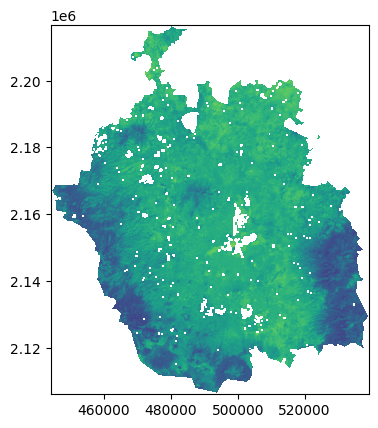

<Axes: >

In [ ]:
fp = r'/tmp/rural_2/rural/ht_island_rural_Ciudad de México.tif'
img2 = rasterio.open(fp)
show(img2)

In [ ]:
img2.shape

(3686, 3172)

In [ ]:
img2.read()

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

In [ ]:
imarray2 = np.array(img2.read())
imarray2[~np.isnan(imarray2)]

array([ -3.62637144,  -4.14089738,  -3.51113534, ..., -14.503754  ,
       -14.2815827 , -14.4546588 ])

In [ ]:
zz = img2.read(1)
x = np.linspace(img1.bounds.left, img1.bounds.right, img1.shape[1])
y = np.linspace(img1.bounds.bottom, img1.bounds.top, img1.shape[0])
xx, yy = np.meshgrid(x, y)
df_diff_cdm = pd.DataFrame({
    'x': xx.flatten(),
    'y': yy.flatten(),
    'diff': zz.flatten(),
})
df_diff_cdm.head(1)

,x,y,diff
0,444000.0,2106150.0,NaN


In [ ]:
df_diff_cdm.loc[~(df_diff_cdm['diff'].isna())]

,x,y,diff
4366,479831.296121,2.106180e+06,-3.626371
4367,479861.305582,2.106180e+06,-4.140897
7537,479801.286660,2.106210e+06,-3.511135
7538,479831.296121,2.106210e+06,-3.781647
7539,479861.305582,2.106210e+06,-4.340965
...,...,...,...
11687302,493635.648061,2.216700e+06,-15.444331
11687303,493665.657521,2.216700e+06,-14.940018
11687304,493695.666982,2.216700e+06,-14.503754
11687305,493725.676443,2.216700e+06,-14.281583


In [ ]:
df_diff_cdm.describe()

,x,y,diff
count,1.169199e+07,1.169199e+07,6.713808e+06
mean,4.915800e+05,2.161440e+06,-2.293127e+00
std,2.747899e+04,3.193036e+04,6.274791e+00
min,4.440000e+05,2.106150e+06,-2.915101e+01
25%,4.677900e+05,2.133787e+06,-5.401419e+00
50%,4.915800e+05,2.161440e+06,-1.312324e-01
75%,5.153700e+05,2.189093e+06,2.025439e+00
max,5.391600e+05,2.216730e+06,2.027760e+01


#Conclusiones

##¿Hay valores faltantes en el conjunto de datos?

Existen valores faltantes dentro del raster de temperaturas sin embargo no son relevantes ya que se necesitan para poder crear un cuadro de x*y de coordenadas donde pueda ser desplegada la zona geografica deseada
##¿Cuáles son las estadísticas resumidas del conjunto de datos?

En promedio, las zonas urbanas presentan temperaturas más altas (30.06°C) que las zonas rurales (27.71°C), lo que apoya la hipótesis de las islas de calor. La variabilidad (desviación estándar) es similar en ambos conjuntos, alrededor de 4.9°C.

##¿Hay valores atípicos en el conjunto de datos?

Existen valores atípicos, especialmente en las temperaturas más altas en las zonas urbanas (cercanas a los 46°C), lo cual podría indicar focos de calor importantes que necesitan mayor análisis.

##¿Cuál es la cardinalidad de las variables categóricas?

No se han identificado variables categóricas en este conjunto de datos, por lo que no es necesario calcular cardinalidad.

##¿Existen distribuciones sesgadas en el conjunto de datos?

Las temperaturas en zonas urbanas parecen estar ligeramente sesgadas hacia temperaturas más altas, lo que puede ser relevante para el análisis de las islas de calor. Esto sugiere que se podría considerar una transformación no lineal en futuros análisis para corregir el sesgo.

##¿Hay correlación entre las variables dependientes e independientes?

Queda pendeinte para un paso posterior.

##¿Cómo se distribuyen los datos en función de diferentes categorías?

No se identifican categorías explícitas, pero la comparación entre zonas urbanas y rurales muestra que las temperaturas urbanas son, en promedio, más altas.

##¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

Queda pendiente para un paso posterior.

##¿Se deberían normalizar las imágenes para visualizarlas mejor?

Sería recomendable normalizar los datos de las imágenes térmicas para mejorar su visualización y detección de puntos críticos de calor en las zonas urbanas.

##¿Hay desequilibrio en las clases de la variable objetivo?

No aplica, ya que no se han definido clases en este conjunto de datos.